In [1]:
import keras
import pandas as pd


In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
X = dataset[:,0:10]

In [7]:
Y = dataset[:,10]

In [8]:
from sklearn import preprocessing

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [10]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [13]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [14]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [30]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [31]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [57]:
learning_rate=0.02
sgd=SGD(learning_rate)
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [58]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=500,
          validation_data=(X_val, Y_val))

Epoch 1/500
32/32 [==============================] - 1s 8ms/step - loss: 0.2226 - accuracy: 0.9080 - val_loss: 0.2298 - val_accuracy: 0.8767
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2221 - accuracy: 0.9061 - val_loss: 0.2332 - val_accuracy: 0.8721
Epoch 3/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2221 - accuracy: 0.9090 - val_loss: 0.2330 - val_accuracy: 0.8721
Epoch 4/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2217 - accuracy: 0.9070 - val_loss: 0.2311 - val_accuracy: 0.8721
Epoch 5/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2234 - accuracy: 0.9061 - val_loss: 0.2325 - val_accuracy: 0.8721
Epoch 6/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2229 - accuracy: 0.9119 - val_loss: 0.2285 - val_accuracy: 0.8813
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2218 - accuracy: 0.9149 - val_loss: 0.2285 - val_accuracy: 0.8813
Epoch 8/500
3

Epoch 59/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2206 - accuracy: 0.9061 - val_loss: 0.2293 - val_accuracy: 0.8767
Epoch 60/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2215 - accuracy: 0.9159 - val_loss: 0.2298 - val_accuracy: 0.8767
Epoch 61/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2193 - accuracy: 0.9100 - val_loss: 0.2387 - val_accuracy: 0.8813
Epoch 62/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2217 - accuracy: 0.9080 - val_loss: 0.2284 - val_accuracy: 0.8813
Epoch 63/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2199 - accuracy: 0.9100 - val_loss: 0.2286 - val_accuracy: 0.8813
Epoch 64/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2198 - accuracy: 0.9080 - val_loss: 0.2352 - val_accuracy: 0.8721
Epoch 65/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2180 - accuracy: 0.9149 - val_loss: 0.2341 - val_accuracy: 0.8721
Epoch 

32/32 [==============================] - 0s 1ms/step - loss: 0.2168 - accuracy: 0.9090 - val_loss: 0.2274 - val_accuracy: 0.8813
Epoch 174/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2166 - accuracy: 0.9100 - val_loss: 0.2313 - val_accuracy: 0.8721
Epoch 175/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2159 - accuracy: 0.9139 - val_loss: 0.2457 - val_accuracy: 0.8858
Epoch 176/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2193 - accuracy: 0.9139 - val_loss: 0.2287 - val_accuracy: 0.8721
Epoch 177/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2171 - accuracy: 0.9080 - val_loss: 0.2271 - val_accuracy: 0.8813
Epoch 178/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2175 - accuracy: 0.9090 - val_loss: 0.2301 - val_accuracy: 0.8721
Epoch 179/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2171 - accuracy: 0.9110 - val_loss: 0.2273 - val_accuracy: 0.8813
Epoch 180/500

32/32 [==============================] - 0s 1ms/step - loss: 0.2132 - accuracy: 0.9129 - val_loss: 0.2257 - val_accuracy: 0.8858
Epoch 288/500
32/32 [==============================] - 0s 1ms/step - loss: 0.2144 - accuracy: 0.9119 - val_loss: 0.2255 - val_accuracy: 0.8813
Epoch 289/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2123 - accuracy: 0.9090 - val_loss: 0.2253 - val_accuracy: 0.8813
Epoch 290/500
32/32 [==============================] - 0s 1ms/step - loss: 0.2115 - accuracy: 0.9139 - val_loss: 0.2254 - val_accuracy: 0.8858
Epoch 291/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2138 - accuracy: 0.9129 - val_loss: 0.2263 - val_accuracy: 0.8767
Epoch 292/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2116 - accuracy: 0.9129 - val_loss: 0.2255 - val_accuracy: 0.8813
Epoch 293/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2121 - accuracy: 0.9119 - val_loss: 0.2258 - val_accuracy: 0.8858
Epoch 294/500

32/32 [==============================] - 0s 2ms/step - loss: 0.2096 - accuracy: 0.9149 - val_loss: 0.2268 - val_accuracy: 0.8813
Epoch 402/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2075 - accuracy: 0.9149 - val_loss: 0.2288 - val_accuracy: 0.8721
Epoch 403/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.9168 - val_loss: 0.2253 - val_accuracy: 0.8858
Epoch 404/500
32/32 [==============================] - 0s 1ms/step - loss: 0.2093 - accuracy: 0.9129 - val_loss: 0.2250 - val_accuracy: 0.8813
Epoch 405/500
32/32 [==============================] - 0s 1ms/step - loss: 0.2104 - accuracy: 0.9129 - val_loss: 0.2256 - val_accuracy: 0.8813
Epoch 406/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2084 - accuracy: 0.9129 - val_loss: 0.2299 - val_accuracy: 0.8767
Epoch 407/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2100 - accuracy: 0.9119 - val_loss: 0.2249 - val_accuracy: 0.8813
Epoch 408/500

In [59]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 1ms/step - loss: 0.2437 - accuracy: 0.8995


0.8995434045791626

In [35]:
import matplotlib.pyplot as plt

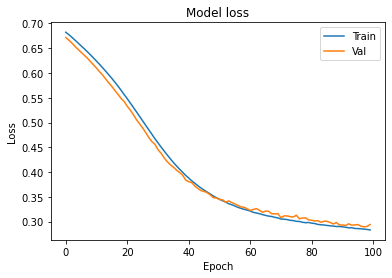

In [36]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

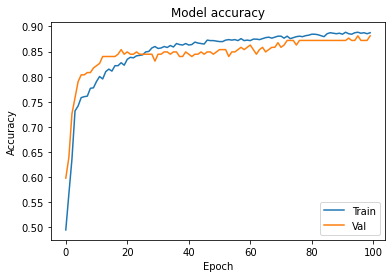

In [37]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [38]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 24ms/step - loss: 0.4862 - accuracy: 0.7740 - val_loss: 0.3485 - val_accuracy: 0.8447
Epoch 2/100
32/32 [==============================] - ETA: 0s - loss: 0.3552 - accuracy: 0.86 - 1s 20ms/step - loss: 0.3532 - accuracy: 0.8640 - val_loss: 0.3068 - val_accuracy: 0.8539
Epoch 3/100
32/32 [==============================] - 1s 18ms/step - loss: 0.3145 - accuracy: 0.8669 - val_loss: 0.2964 - val_accuracy: 0.8630
Epoch 4/100
32/32 [==============================] - 1s 18ms/step - loss: 0.2876 - accuracy: 0.8767 - val_loss: 0.3090 - val_accuracy: 0.8676
Epoch 5/100
32/32 [==============================] - 1s 18ms/step - loss: 0.2990 - accuracy: 0.8894 - val_loss: 0.2609 - val_accuracy: 0.8858
Epoch 6/100
32/32 [==============================] - 1s 18ms/step - loss: 0.2794 - accuracy: 0.8826 - val_loss: 0.2767 - val_accuracy: 0.8858
Epoch 7/100
32/32 [==============================] - 1s 18ms/step - loss: 0.2578 - accuracy: 0.8963 - val_

32/32 [==============================] - 1s 16ms/step - loss: 0.1645 - accuracy: 0.9364 - val_loss: 0.2458 - val_accuracy: 0.8813
Epoch 59/100
32/32 [==============================] - 1s 16ms/step - loss: 0.1705 - accuracy: 0.9276 - val_loss: 0.3021 - val_accuracy: 0.8676
Epoch 60/100
32/32 [==============================] - 1s 16ms/step - loss: 0.1964 - accuracy: 0.9149 - val_loss: 0.2565 - val_accuracy: 0.8858
Epoch 61/100
32/32 [==============================] - 1s 17ms/step - loss: 0.1556 - accuracy: 0.9325 - val_loss: 0.2547 - val_accuracy: 0.8813
Epoch 62/100
32/32 [==============================] - 1s 16ms/step - loss: 0.1509 - accuracy: 0.9335 - val_loss: 0.2476 - val_accuracy: 0.8858
Epoch 63/100
32/32 [==============================] - 1s 16ms/step - loss: 0.1658 - accuracy: 0.9364 - val_loss: 0.2476 - val_accuracy: 0.8858
Epoch 64/100
32/32 [==============================] - 1s 16ms/step - loss: 0.1491 - accuracy: 0.9384 - val_loss: 0.2458 - val_accuracy: 0.8858
Epoch 65/100

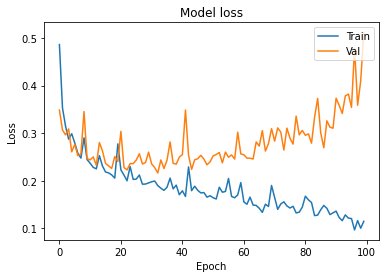

In [39]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

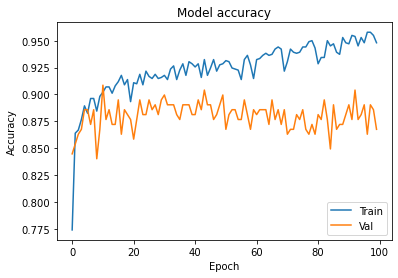

In [40]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [41]:
from keras.layers import Dropout
from keras import regularizers

In [42]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [43]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 38ms/step - loss: 14.2416 - accuracy: 0.6888 - val_loss: 3.8408 - val_accuracy: 0.8219
Epoch 2/100
32/32 [==============================] - 1s 31ms/step - loss: 1.6609 - accuracy: 0.8601 - val_loss: 0.6964 - val_accuracy: 0.8311
Epoch 3/100
32/32 [==============================] - 1s 31ms/step - loss: 0.5625 - accuracy: 0.8708 - val_loss: 0.4966 - val_accuracy: 0.8584
Epoch 4/100
32/32 [==============================] - 1s 31ms/step - loss: 0.5170 - accuracy: 0.8699 - val_loss: 0.5359 - val_accuracy: 0.8447
Epoch 5/100
32/32 [==============================] - 1s 31ms/step - loss: 0.5294 - accuracy: 0.8376 - val_loss: 0.5143 - val_accuracy: 0.8721
Epoch 6/100
32/32 [==============================] - 1s 31ms/step - loss: 0.4695 - accuracy: 0.8845 - val_loss: 0.4521 - val_accuracy: 0.8630
Epoch 7/100
32/32 [==============================] - 1s 32ms/step - loss: 0.4714 - accuracy: 0.8767 - val_loss: 0.4525 - val_accuracy: 0.8630
Epoch

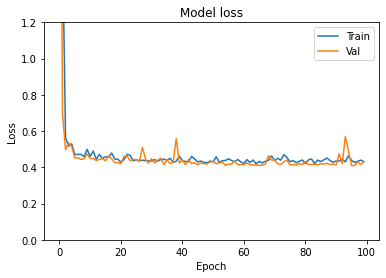

In [44]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

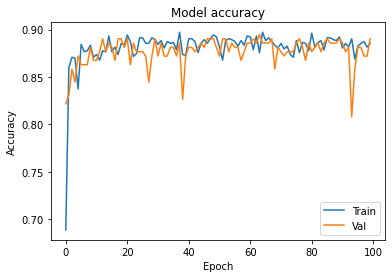

In [45]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()